In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

enrolment_df = pd.read_csv("../data/clean_enrolment.csv")
biometric_df = pd.read_csv("../data/clean_biometric.csv")
demographic_df = pd.read_csv("../data/clean_demographic.csv")

enrolment_df["date"] = pd.to_datetime(enrolment_df["date"])
biometric_df["date"] = pd.to_datetime(biometric_df["date"])
demographic_df["date"] = pd.to_datetime(demographic_df["date"])


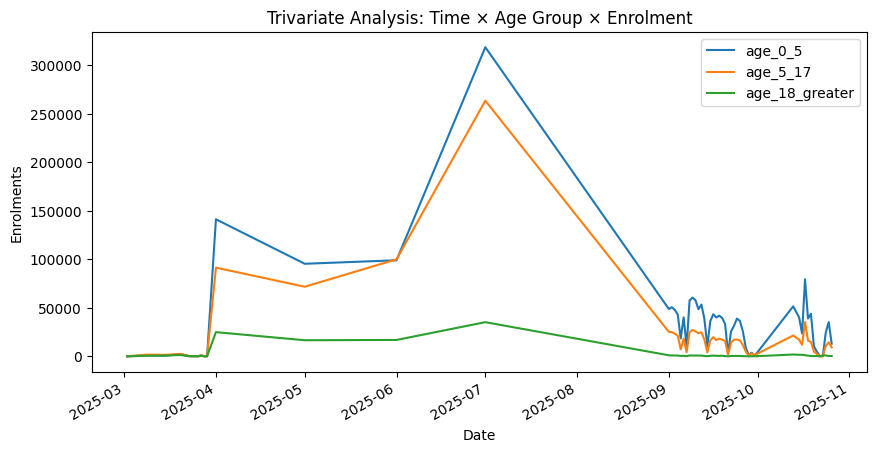

In [2]:
age_time = (
    enrolment_df
    .groupby(["date"])[["age_0_5", "age_5_17", "age_18_greater"]]
    .sum()
    .reset_index()
)

age_time.set_index("date").plot(figsize=(10, 5))
plt.title("Trivariate Analysis: Time × Age Group × Enrolment")
plt.xlabel("Date")
plt.ylabel("Enrolments")
plt.show()


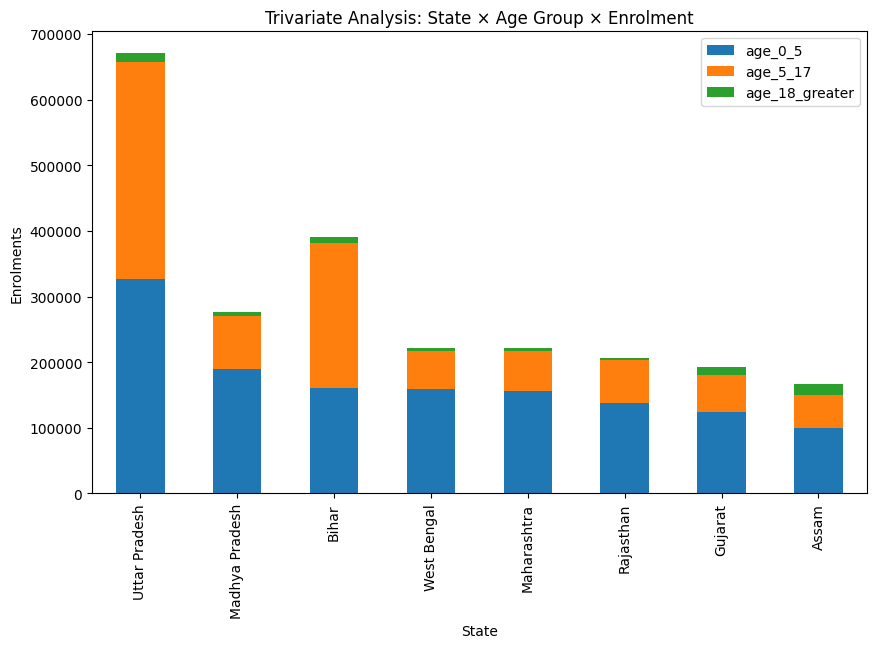

In [3]:
state_age = (
    enrolment_df
    .groupby(["state"])[["age_0_5", "age_5_17", "age_18_greater"]]
    .sum()
    .sort_values(by="age_0_5", ascending=False)
    .head(8)
)

state_age.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Trivariate Analysis: State × Age Group × Enrolment")
plt.xlabel("State")
plt.ylabel("Enrolments")
plt.show()


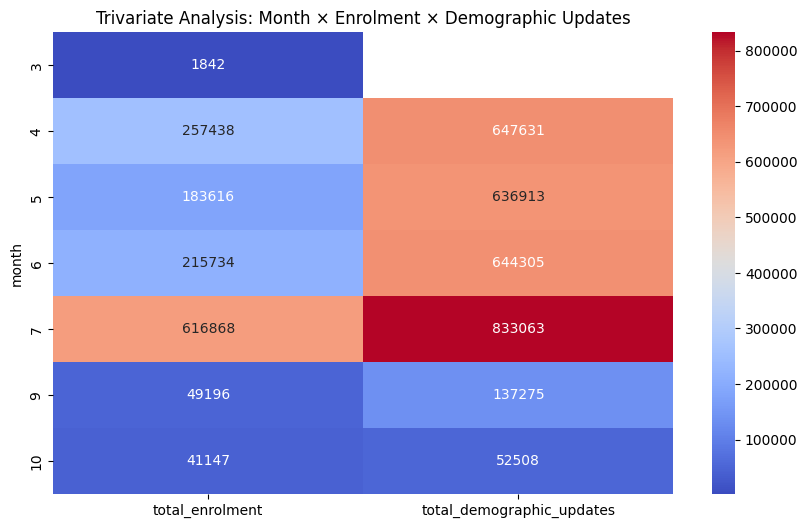

In [4]:
merged = (
    enrolment_df.groupby("date")["total_enrolment"].sum()
    .to_frame()
    .join(demographic_df.groupby("date")["total_demographic_updates"].sum())
)

merged["month"] = merged.index.month

plt.figure(figsize=(10, 6))
sns.heatmap(
    merged.groupby("month")[["total_enrolment", "total_demographic_updates"]].mean(),
    annot=True,
    fmt=".0f",
    cmap="coolwarm"
)
plt.title("Trivariate Analysis: Month × Enrolment × Demographic Updates")
plt.show()
